In [1]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# loading csv
bs = pd.read_csv(r'D:\bin\data sets\bigmart\Train.csv')

In [3]:
print(bs.shape)


(8523, 12)


In [4]:
bs.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:

bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
bs.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#handling missing values
bs.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# mean value item weight
bs['Item_Weight'].mean()

12.857645184136183

In [9]:
# filling item weight with mean value
bs['Item_Weight'].fillna(bs['Item_Weight'].mean(),inplace = True)

In [10]:
# replacing na values of outlet size with mode
mode_of_outlet_size = bs.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=( lambda x:x.mode()[0]))

In [11]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values = bs['Outlet_Size'].isnull()

In [13]:
bs.loc[missing_values,'Outlet_Size'] =bs.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [14]:
bs.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
# data analysis
bs.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 432x432 with 0 Axes>

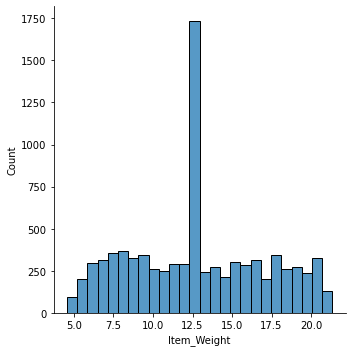

In [16]:
plt.figure(figsize = (6,6))
sn.displot(bs['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

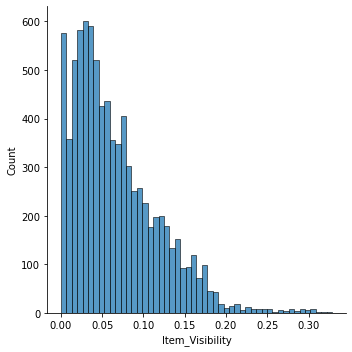

In [17]:
plt.figure(figsize = (6,6))
sn.displot(bs['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

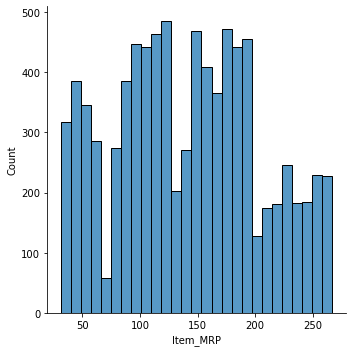

In [18]:
plt.figure(figsize = (6,6))
sn.displot(bs['Item_MRP'])
plt.show()

<Figure size 432x432 with 0 Axes>

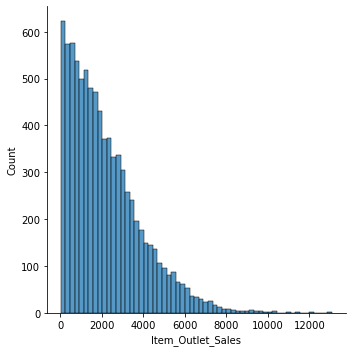

In [19]:
plt.figure(figsize = (6,6))
sn.displot(bs['Item_Outlet_Sales'])
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

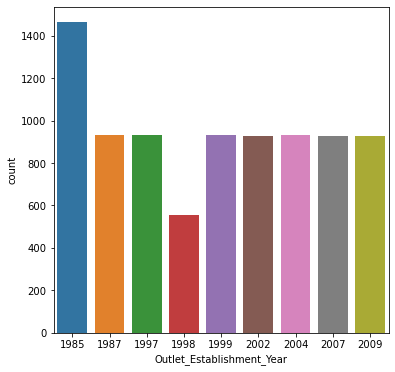

In [20]:
# Outlet_Establishment_Year
plt.figure(figsize = (6,6))
sn.countplot(x='Outlet_Establishment_Year',data = bs)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

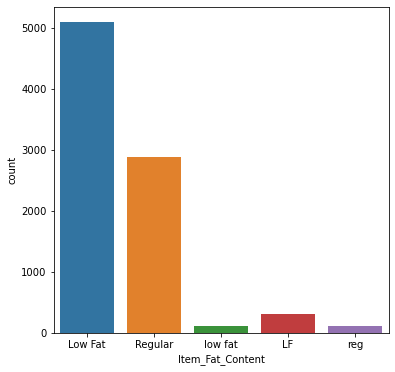

In [21]:
# categorical features total 7
plt.figure(figsize = (6,6))
sn.countplot(x='Item_Fat_Content',data = bs)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

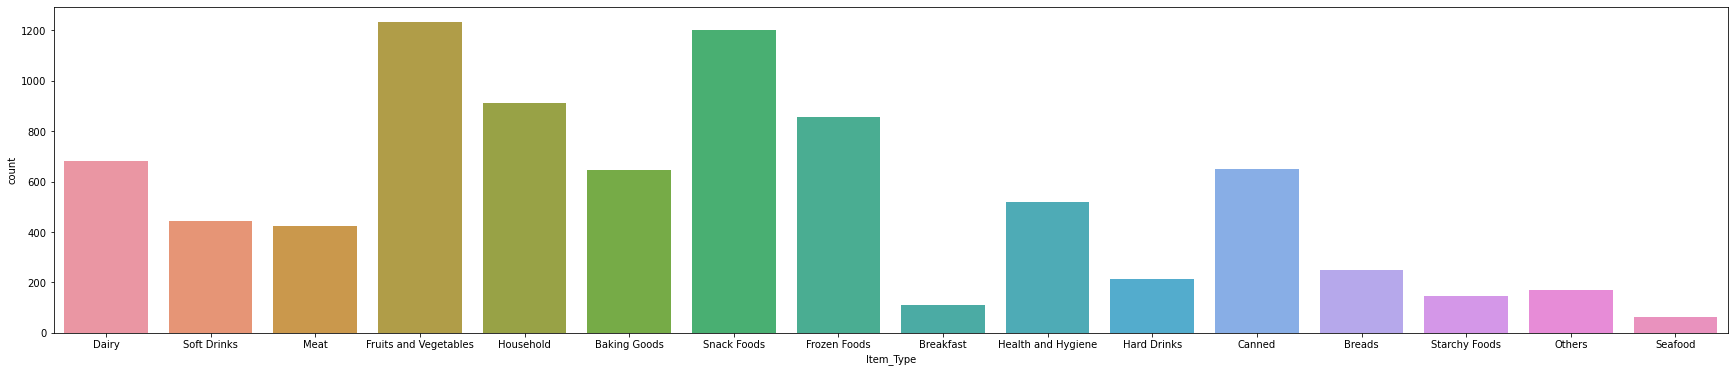

In [22]:
plt.figure(figsize = (30,6))
sn.countplot(x='Item_Type',data = bs)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

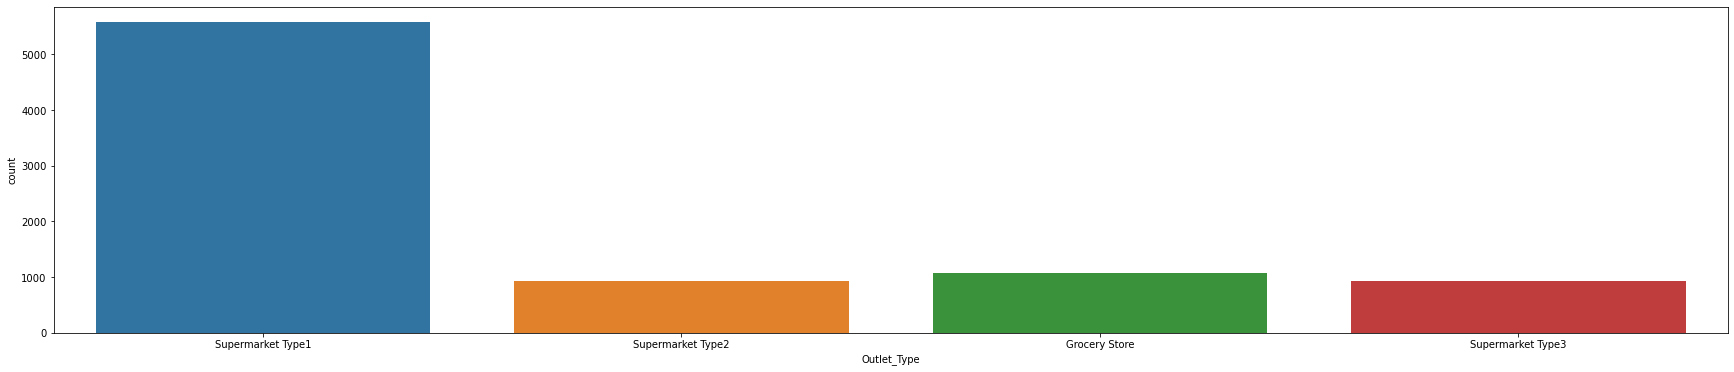

In [23]:
plt.figure(figsize = (30,6))
sn.countplot(x='Outlet_Type',data = bs)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

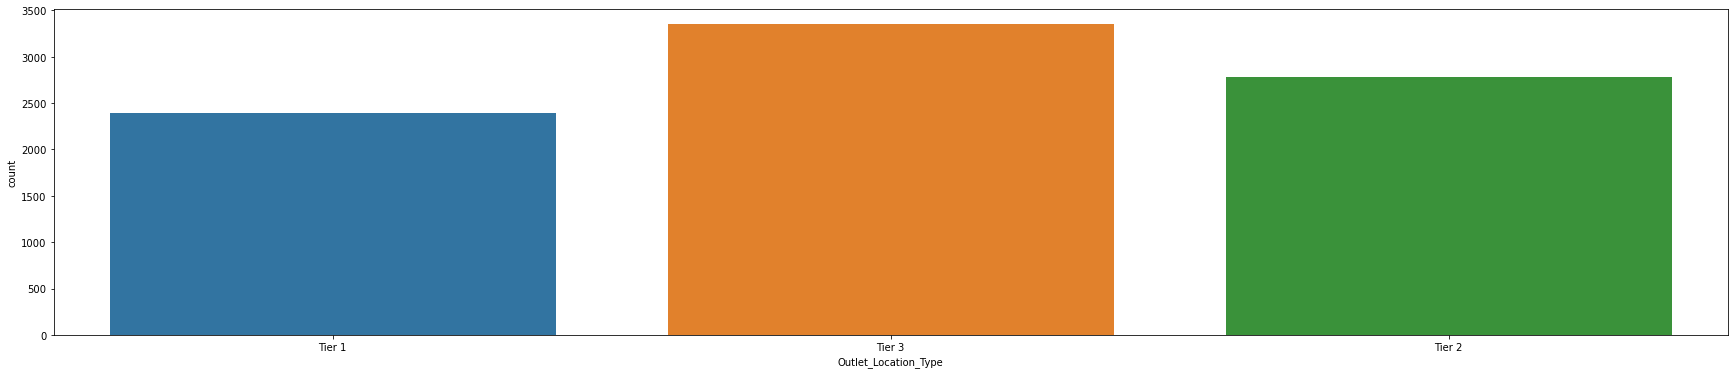

In [24]:
plt.figure(figsize = (30,6))
sn.countplot(x='Outlet_Location_Type',data = bs)

In [25]:
# data preprocessing
# we are doing label encoding


In [26]:
bs['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
bs.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [28]:
bs['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
encoder = LabelEncoder()

In [30]:
bs['Item_Identifier'] = encoder.fit_transform(bs['Item_Identifier'])

In [31]:
bs['Item_Weight'] = encoder.fit_transform(bs['Item_Weight'])

In [32]:
bs['Item_Fat_Content'] = encoder.fit_transform(bs['Item_Fat_Content'])

In [33]:
bs['Item_Type'] = encoder.fit_transform(bs['Item_Type'])

In [34]:
bs['Outlet_Identifier'] = encoder.fit_transform(bs['Outlet_Identifier'])

In [35]:
bs['Outlet_Location_Type'] = encoder.fit_transform(bs['Outlet_Location_Type'])

In [36]:
bs['Outlet_Type'] = encoder.fit_transform(bs['Outlet_Type'])

In [38]:
bs['Outlet_Size'] = encoder.fit_transform(bs['Outlet_Size'])

In [39]:
bs

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,57,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,376,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,393,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,265,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,233,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,299,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,149,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [41]:
X = bs.drop(columns ='Item_Outlet_Sales',axis =1)

In [42]:
Y = bs['Item_Outlet_Sales']

In [45]:
#splliting the data into training data and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 2)

In [46]:
print(X.shape)

(8523, 11)


In [47]:
print(X_train.shape)

(6818, 11)


In [48]:
print(X_test.shape)

(1705, 11)


In [49]:
# model training
# using xg boost regressor
regressor = XGBRegressor()

In [50]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [55]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [56]:
print('R Squared value = ', r2_train)

R Squared value =  0.8639680373364909


In [57]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [59]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [60]:
print('R Squared value = ', r2_test)

R Squared value =  0.5233028781132891
